In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import models
import utils
import main

%load_ext autoreload
%autoreload 

logger = models.logger
logger(".")

2024-10-14 22:28:44 | .


## Accuracy matrix
---

2024-10-14 16:54:14 | bias=False
100%|███████████████████████████████████████████████| 5/5 [00:00<00:00,  7.09it/s]


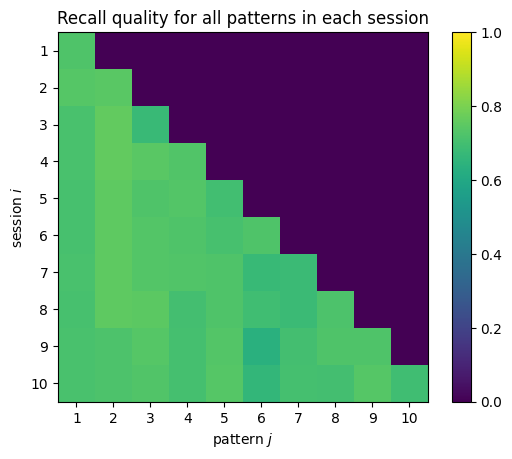

In [15]:
num_samples = 10
out, model, data = utils.train_for_accuracy_lec(alpha=0.4, num_rep=5,
                                            num_samples=num_samples, idx=4)
""" plot """
fig1 = plt.figure()
plt.imshow(out.mean(axis=0), vmin=0, vmax=1)
plt.title(f"Recall quality for all patterns in each session")
plt.xlabel("pattern $j$")
plt.ylabel("session $i$")
plt.xticks(range(num_samples), range(1, num_samples+1))
plt.yticks(range(num_samples), range(1, num_samples+1))
plt.colorbar()
plt.show()

In [22]:
num_samples = 10
out, model, data = utils.train_for_accuracy(alpha=0.5, num_rep=100,
                                            num_samples=num_samples)

2024-10-14 16:55:58 | bias not found in the info file, set to True
2024-10-14 16:55:58 | bias=True
100%|███████████████████████████████████████████| 100/100 [00:01<00:00, 69.58it/s]


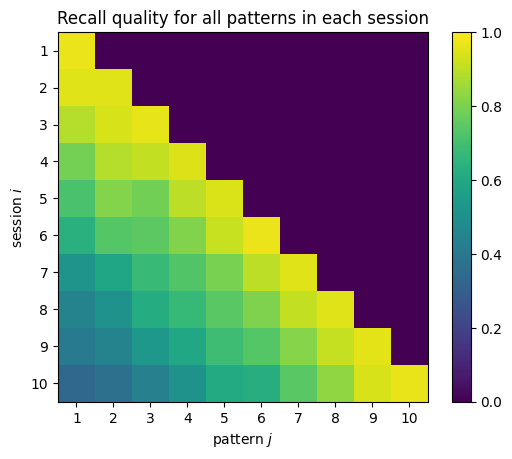

In [23]:
""" plot """
fig1 = plt.figure()
plt.imshow(out.mean(axis=0), vmin=0, vmax=1)
plt.title(f"Recall quality for all patterns in each session")
plt.xlabel("pattern $j$")
plt.ylabel("session $i$")
plt.xticks(range(num_samples), range(1, num_samples+1))
plt.yticks(range(num_samples), range(1, num_samples+1))
plt.colorbar()
plt.show()

## Reconstruction
---

2024-10-14 22:38:28 | using LEC data
2024-10-14 22:38:28 | bias=False
/Users/daniekru/Research/lab/KAMemory/src/models.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

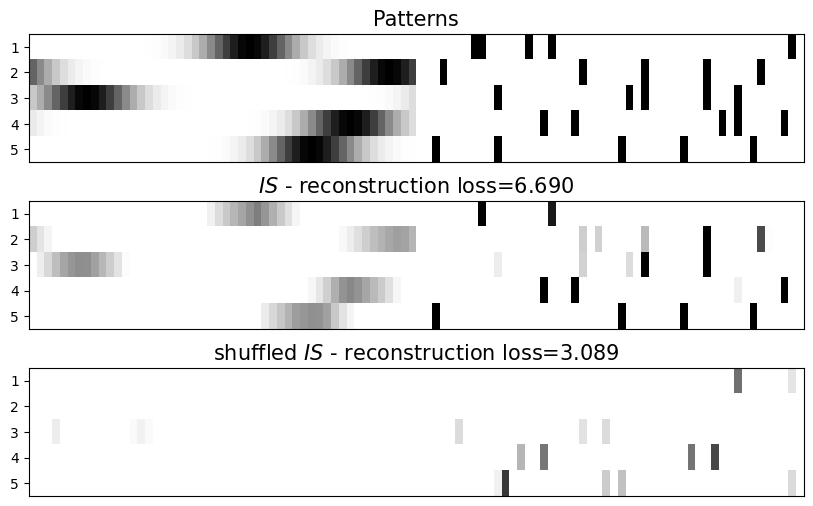

In [37]:
np.random.seed(12)

results = utils.train_for_reconstruction(alpha=0.5, num_samples=5, verbose=False, bias=True, use_lec=True, idx=0,
                                         binarize=0)

""" plot """
fig_d, (ax12, ax22, ax32) = plt.subplots(3, 1,
                                figsize=(10, 6), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="Patterns",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl_rnd"], ax=ax32,
                         title=f"shuffled $IS$ - " + \
                f"reconstruction loss={results['rec_loss_rnd']:.3f}",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl"], ax=ax22,
                         title=f"$IS$ - " + \
                f"reconstruction loss={results['rec_loss']:.3f}",
                         proper_title=True)

plt.show()

---

In [191]:
def plot_squashed_data(data: np.ndarray, title: str="",
                       ax: plt.Axes=None, squash: bool=False,
                       proper_title: bool=False):

    """
    This function plots the squashed data

    Parameters
    ----------
    data : np.ndarray
        squashed data
    title : str, optional
        title of the plot, by default ""
    ax : plt.Axes, optional
        axis of the plot, by default None
    """

    if squash:
        data = data.sum(axis=0).reshape(1, -1)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    ax.imshow(data, aspect="auto", cmap="gray_r", vmin=0, vmax=1)
    if proper_title:
        ax.set_title(title, fontsize=15)
    else:
        ax.set_ylabel(title, fontsize=labsize)
    ax.set_yticks(range(len(data)), range(1, 1+len(data)))
    ax.yaxis.tick_right()

    ax.set_xticks([])

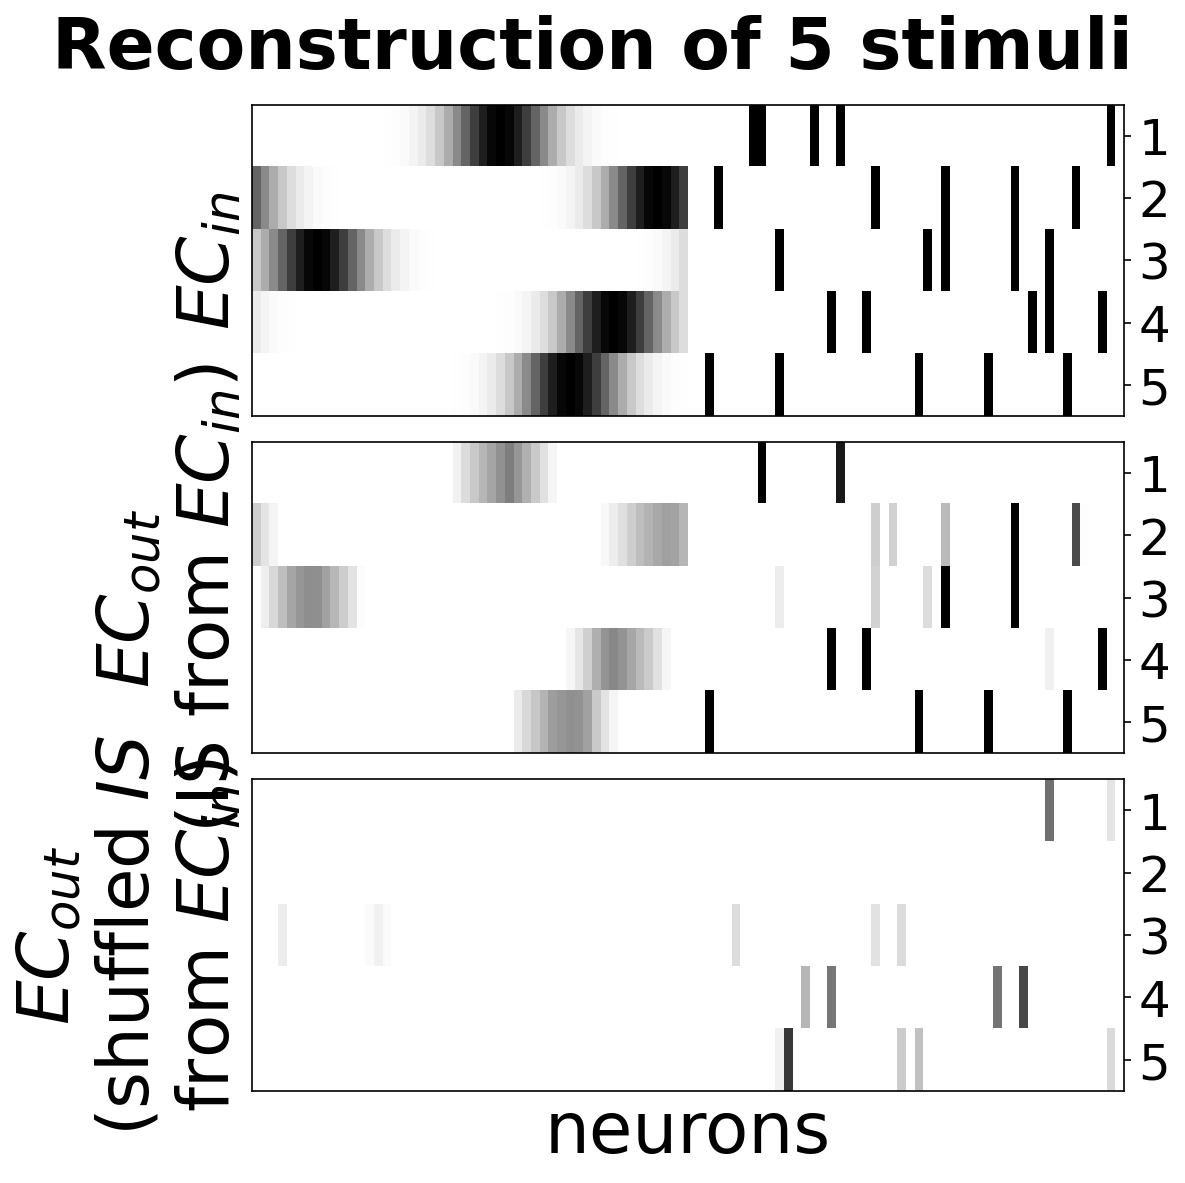

In [192]:
fig_d, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8), sharex=True, dpi=150)
plt.subplots_adjust(hspace=0.3)

# Plot for Patterns
plot_squashed_data(data=results["data"], ax=ax1, title="$EC_{{in}}$",
                         proper_title=False)


# Plot for IS
plot_squashed_data(data=results["out_mtl"], ax=ax2,
                         title="$EC_{{out}}$\n(IS from $EC_{in}$)",
                         proper_title=False)

# Plot for shuffled IS
plot_squashed_data(data=results["out_mtl_rnd"], ax=ax3,
                         title="$EC_{out}$\n(shuffled $IS$\nfrom $EC_{in}$)",
                         proper_title=False)

# Adjust font sizes
for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    #ax.tick_params(axis='both', which='minor', labelsize=20)

# Add a common x-label
#fig_d.text(0.5, 0.0, 'neurons', ha='center', fontsize=15)

# labels & title
fig_d.suptitle("Reconstruction of 5 stimuli", fontsize=titlesize, fontweight="bold")
ax3.set_xlabel("neurons", fontsize=labsize)

plt.tight_layout()
plt.show()

---

In [7]:
# --- load autoencoder
info, autoencoder = models.load_session(
    idx=0, verbose=True)


out_ae, latent_ae = utils.reconstruct_data(
                                data=training_samples,
                                num=num_btsp_samples,
                                model=autoencoder,
                                show=False, 
                                plot=False)

2024-10-14 17:43:57 | Pre-selected session: [0]
2024-10-14 17:43:57 | bias=False
2024-10-14 17:43:57 | info:


{'mec_N_x': 50, 'mec_N_y': 1, 'dim_mec': 50, 'mec_sigma': 4, 'dim_lec': 50, 'num_cues': 2, 'bias': False, 'dim_ei': 100, 'dim_ca3': 1000, 'dim_ca1': 1000, 'dim_eo': 100, 'K_lec': 5, 'K_ei': 10, 'K_ca3': 15, 'K_ca1': 15, 'K_eo': 10, 'beta_ei': 150, 'beta_ca3': 150, 'beta_ca1': 150, 'beta_eo': 150, 'alpha': 0.5}
{'date': '14/10/2024 17:18:22',
 'epochs': 1000,
 'loss_ae': 2e-05,
 'network_params': {'K_ca1': 15,
                    'K_ca3': 15,
                    'K_ei': 10,
                    'K_eo': 10,
                    'K_lec': 5,
                    'alpha': 0.5,
                    'beta_ca1': 150,
                    'beta_ca3': 150,
                    'beta_ei': 150,
                    'beta_eo': 150,
                    'bias': False,
                    'dim_ca1': 1000,
                    'dim_ca3': 1000,
                    'dim_ei': 100,
                    'dim_eo': 100,
                    'dim_lec': 50,
                    'dim_mec': 50,
                    'mec_N_x'

NameError: name 'training_samples' is not defined

2024-10-14 16:30:59 | using LEC data
2024-10-14 16:30:59 | bias=False
100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 21.38it/s]
2024-10-14 16:30:59 | bias=False
100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 867.60it/s]


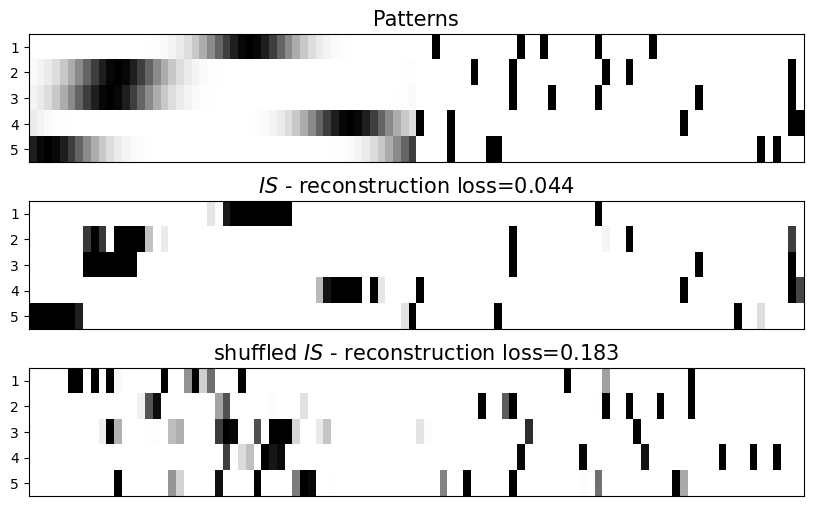

In [4]:
""" with `weight_only=True` """

np.random.seed(0)

results = utils.train_for_reconstruction(alpha=0.3, num_samples=5, verbose=False, bias=True, use_lec=True, idx=4)

""" plot """
fig2, (ax12, ax22, ax32) = plt.subplots(3, 1,
                                figsize=(10, 6), sharex=True)

plt.subplots_adjust(hspace=0.3)

is_squash = False

utils.plot_squashed_data(data=results["data"],
                         ax=ax12,
                         title="Patterns",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl_rnd"], ax=ax32,
                         title=f"shuffled $IS$ - " + \
                f"reconstruction loss={results['rec_loss_rnd']:.3f}",
                         proper_title=True)
utils.plot_squashed_data(data=results["out_mtl"], ax=ax22,
                         title=f"$IS$ - " + \
                f"reconstruction loss={results['rec_loss']:.3f}",
                         proper_title=True)

plt.show()

## BTSP weight plot
---

**IS present, ET present** : $\Delta W = 1 - \alpha W$

**IS present, ET absent** : $\Delta W = - \alpha W$

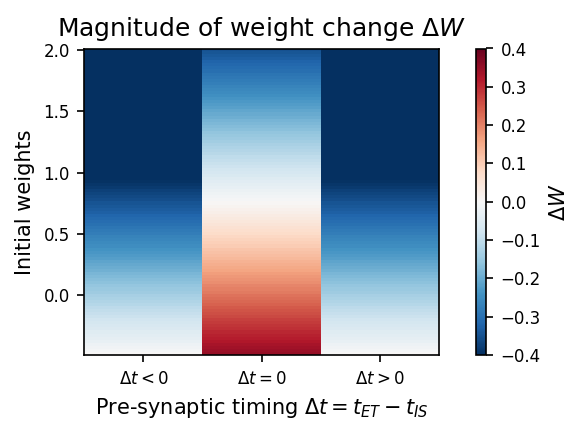

In [89]:
n = 100
alpha = 0.35
values = np.zeros((n, 3))

u = np.linspace(0, 2., n)
values[:, 1] = alpha * (1 - u)
values[:, 0] = - alpha * u
values[:, 2] = - alpha * u


values = np.flip(values, axis=0)

""" plot """
fig_b, ax = plt.subplots(figsize=(4, 3), dpi=150)

im = ax.imshow(values, aspect="auto", interpolation="nearest",
               cmap="RdBu_r", vmin=-0.4, vmax=0.4)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["$\\Delta t<0$", "$\\Delta t=0$", "$\\Delta t>0$"], fontsize=8)
ax.set_yticks(range(0, n, 20))
ax.set_yticklabels(np.around(np.linspace(max(u), 0, len(range(0, n, 20))), 1), fontsize=8)

ax.set_ylabel("Initial weights", fontsize=10)
ax.set_xlabel("Pre-synaptic timing $\\Delta t = t_{ET} - t_{IS}$", fontsize=10)

cbar = fig_b.colorbar(im, ax=ax, aspect=30, pad=0.08)
cbar.set_label("$\Delta W$", fontsize=10)
cbar.ax.tick_params(labelsize=8)

ax.set_title("Magnitude of weight change $\\Delta W$", fontsize=12)

plt.tight_layout()
plt.show()

---

## final: d, f

In [259]:
""" settings """
labsize = 24
titlesize = 34
ticksize = 24

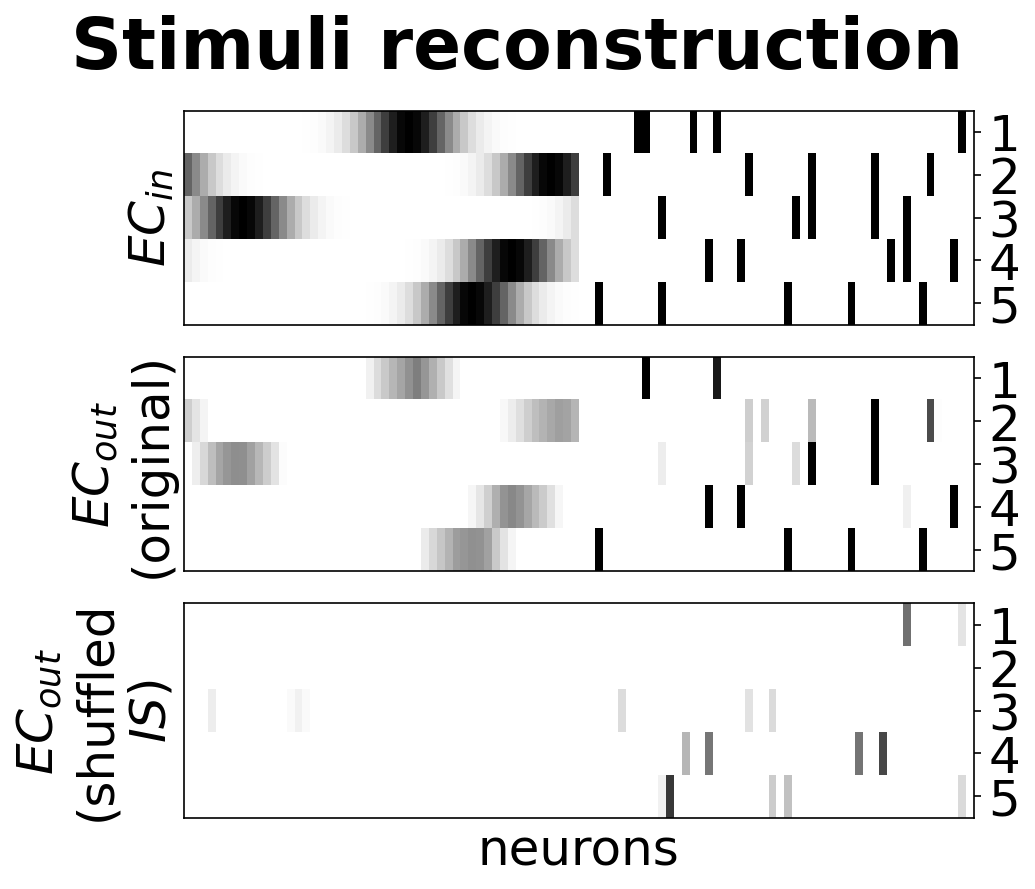

In [260]:
fig_d, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 6), sharex=True, dpi=150)
plt.subplots_adjust(hspace=0.3)

# Plot for Patterns
plot_squashed_data(data=results["data"], ax=ax1, title="$EC_{{in}}$",
                         proper_title=False)


# Plot for IS
plot_squashed_data(data=results["out_mtl"], ax=ax2,
                         title="$EC_{{out}}$ \n(original)",
                         proper_title=False)

# Plot for shuffled IS
plot_squashed_data(data=results["out_mtl_rnd"], ax=ax3,
                         title="$EC_{out}$\n(shuffled\n$IS$)",
                         proper_title=False)

# Adjust font sizes
for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    #ax.tick_params(axis='both', which='minor', labelsize=20)

# Add a common x-label
#fig_d.text(0.5, 0.0, 'neurons', ha='center', fontsize=15)

# labels & title
fig_d.suptitle("Stimuli reconstruction", fontsize=titlesize, fontweight="bold")
ax3.set_xlabel("neurons", fontsize=labsize)

plt.tight_layout()
plt.show()

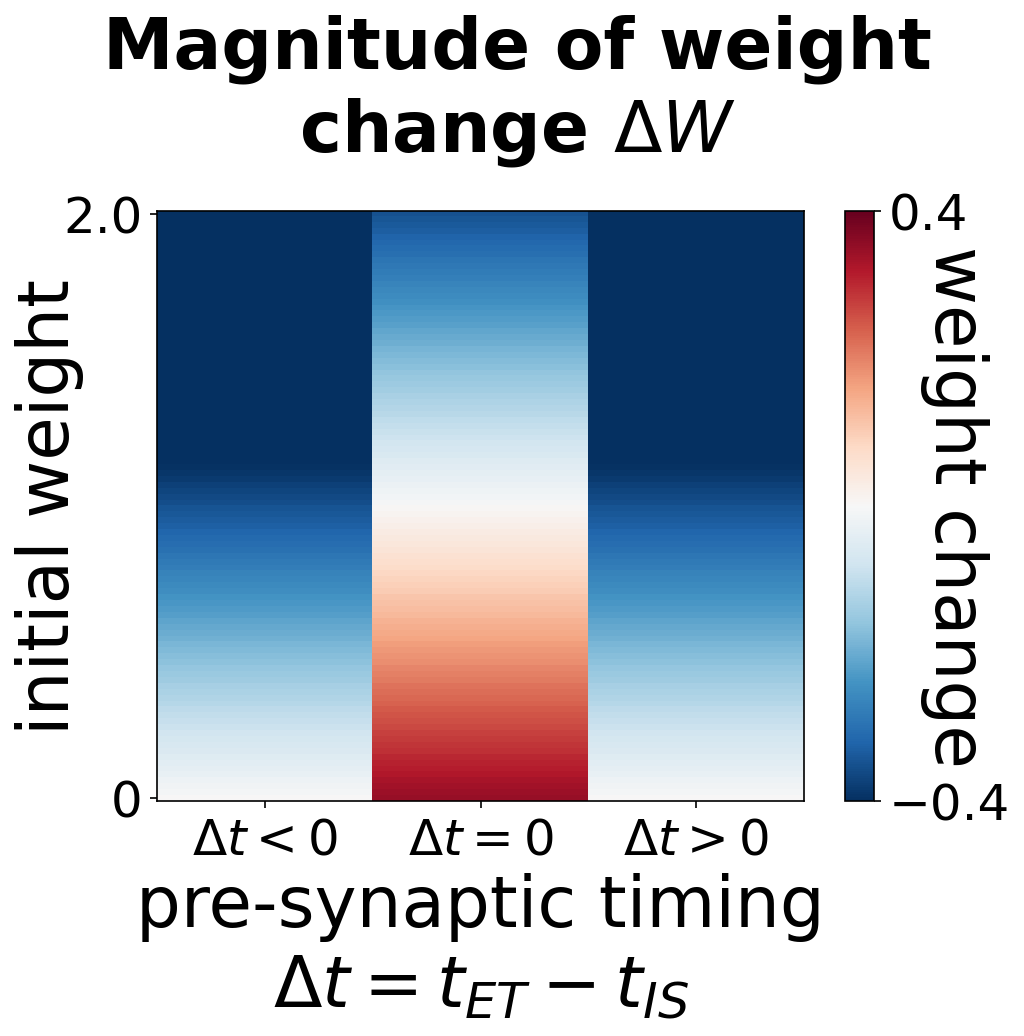

In [215]:
fig_b, ax_b = plt.subplots(figsize=(7, 7), dpi=150)

cax_b = ax_b.imshow(values, aspect="auto", interpolation="nearest",
               cmap="RdBu_r", vmin=-0.4, vmax=0.4)

# colorbar
cbar = fig_b.colorbar(cax_b, ax=ax_b, ticks=[-0.4, 0.4])
cbar.set_label("weight change", fontsize=labsize,
              rotation=-90, labelpad=-10)
cbar.ax.tick_params(labelsize=ticksize)

# labels & title
ax_b.set_ylabel("initial weight", fontsize=labsize, labelpad=-10)
ax_b.set_xlabel("pre-synaptic timing\n$\\Delta t = t_{ET} - t_{IS}$",
                fontsize=labsize)
fig_b.suptitle("Magnitude of weight\nchange $\\Delta W$", fontsize=titlesize,
              fontweight="bold")

# xaxis
ax_b.set_xticks([0, 1, 2])
ax_b.set_xticklabels(["$\\Delta t<0$", "$\\Delta t=0$", "$\\Delta t>0$"],
                     fontsize=ticksize)

# yaxis
ax_b.set_yticks([0, 99])
ax_b.set_yticklabels([max(u), 0],
                     fontsize=ticksize)

plt.tight_layout()
plt.show()

---
blank, for title

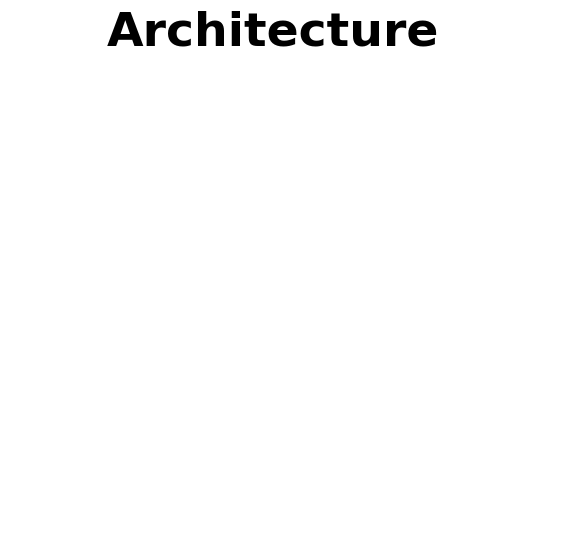

2024-10-15 21:21:18 | saved


In [237]:
fig_a, ax = plt.subplots(figsize=(7, 6))

fig_a.suptitle("Architecture", fontsize=34, fontweight="bold")
ax.axis("off")
plt.show()


fig_a.savefig(f"{utils.MEDIA_PATH}/figure_a_title.svg")
logger("saved")

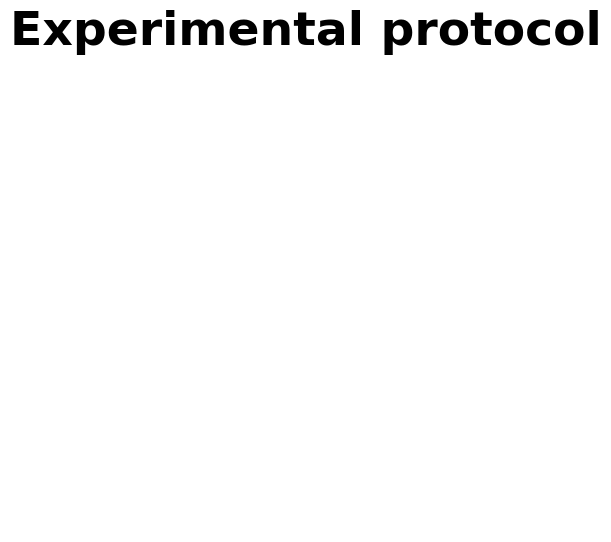

2024-10-15 21:21:19 | saved


In [238]:
fig_c, ax = plt.subplots(figsize=(7, 6))

fig_c.suptitle("Experimental protocol", fontsize=34, fontweight="bold")
ax.axis("off")
plt.show()


fig_c.savefig(f"{utils.MEDIA_PATH}/figure_c_title.svg")
logger("saved")

---
### Save figure

In [221]:
fig_b.savefig(f"{utils.MEDIA_PATH}/figure_b2.svg")
logger("saved")

2024-10-15 18:37:10 | saved


In [261]:
fig_d.savefig(f"{utils.MEDIA_PATH}/figure_d2.svg")
logger("saved")

2024-10-15 21:27:31 | saved
